In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
df = pd.read_csv('clean_smartphones.csv')

## Understanding the Data :

In [3]:
df.head()

,brand,processor_name,processor_cores,processor_speed,os,ram,storage,battery_capacity,battery_power,DualSim,...,wifi,ngc,irblaster,display_size,display_resolution,rear_camera,front_camera,memory_card_supported,rating,price
0,OnePlus,Snapdragon,8.0,3.2,Android v13,12 GB RAM,256 GB inbuilt,5000 mAh,100W,1,...,1,1,0,6.70,1440x3216,50.0,16.0,0.0,89.0,54999
1,OnePlus,Snapdragon,8.0,2.2,Android v12,6 GB RAM,128 GB inbuilt,5000 mAh,33W,1,...,1,0,0,6.59,1080x2412,64.0,16.0,1.0,81.0,19989
2,Samsung,Exynos,8.0,2.4,Android v13,4 GB RAM,64 GB inbuilt,5000 mAh,15W,1,...,1,0,0,6.60,1080x2408,50.0,13.0,1.0,75.0,16499
3,Motorola,Snapdragon,8.0,2.2,Android v12,6 GB RAM,128 GB inbuilt,5000 mAh,NaN,1,...,1,0,0,6.55,1080x2400,50.0,16.0,1.0,81.0,14999
4,Realme,Dimensity,8.0,2.6,Android v13,6 GB RAM,128 GB inbuilt,5000 mAh,67W,1,...,1,0,0,6.70,1080x2412,108.0,16.0,0.0,82.0,24999


In [4]:
df.shape

(1020, 23)

In [14]:
# missing values percentage
(df.isnull().sum()/1020)*100

brand                     0.000000
processor_name            5.196078
processor_cores           3.921569
processor_speed           8.725490
os                       27.254902
ram                       2.647059
storage                   2.647059
battery_capacity          3.235294
battery_power            24.509804
DualSim                   0.000000
Volte                     0.000000
is_5G                     0.000000
is_Vo5G                   0.000000
wifi                      0.000000
ngc                       0.000000
irblaster                 0.000000
display_size              3.235294
display_resolution        3.235294
rear_camera               6.470588
front_camera              7.549020
memory_card_supported    27.254902
rating                   13.823529
price                     0.000000
dtype: float64

In [6]:
df.duplicated().sum()

2

In [7]:
df = df.drop_duplicates().reset_index(drop=True)

In [8]:
df.head()

,brand,processor_name,processor_cores,processor_speed,os,ram,storage,battery_capacity,battery_power,DualSim,...,wifi,ngc,irblaster,display_size,display_resolution,rear_camera,front_camera,memory_card_supported,rating,price
0,OnePlus,Snapdragon,8.0,3.2,Android v13,12 GB RAM,256 GB inbuilt,5000 mAh,100W,1,...,1,1,0,6.70,1440x3216,50.0,16.0,0.0,89.0,54999
1,OnePlus,Snapdragon,8.0,2.2,Android v12,6 GB RAM,128 GB inbuilt,5000 mAh,33W,1,...,1,0,0,6.59,1080x2412,64.0,16.0,1.0,81.0,19989
2,Samsung,Exynos,8.0,2.4,Android v13,4 GB RAM,64 GB inbuilt,5000 mAh,15W,1,...,1,0,0,6.60,1080x2408,50.0,13.0,1.0,75.0,16499
3,Motorola,Snapdragon,8.0,2.2,Android v12,6 GB RAM,128 GB inbuilt,5000 mAh,NaN,1,...,1,0,0,6.55,1080x2400,50.0,16.0,1.0,81.0,14999
4,Realme,Dimensity,8.0,2.6,Android v13,6 GB RAM,128 GB inbuilt,5000 mAh,67W,1,...,1,0,0,6.70,1080x2412,108.0,16.0,0.0,82.0,24999


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand                  1018 non-null   object 
 1   processor_name         965 non-null    object 
 2   processor_cores        978 non-null    float64
 3   processor_speed        929 non-null    object 
 4   os                     740 non-null    object 
 5   ram                    991 non-null    object 
 6   storage                991 non-null    object 
 7   battery_capacity       985 non-null    object 
 8   battery_power          767 non-null    object 
 9   DualSim                1018 non-null   int64  
 10  Volte                  1018 non-null   int64  
 11  is_5G                  1018 non-null   int64  
 12  is_Vo5G                1018 non-null   int64  
 13  wifi                   1018 non-null   int64  
 14  ngc                    1018 non-null   int64  
 15  irbl

## Exploratory Data Analysis :

### 1. Brand :

In [44]:
df['brand'] = df['brand'].str.replace('itel','Itel')

[(137, 'Xiaomi'), (135, 'Samsung'), (111, 'Vivo'), (97, 'Realme'), (87, 'OPPO'), (53, 'Motorola'), (47, 'Apple'), (42, 'OnePlus'), (41, 'POCO'), (33, 'Tecno'), (32, 'iQOO'), (30, 'Nokia'), (29, 'Infinix'), (16, 'Huawei')]


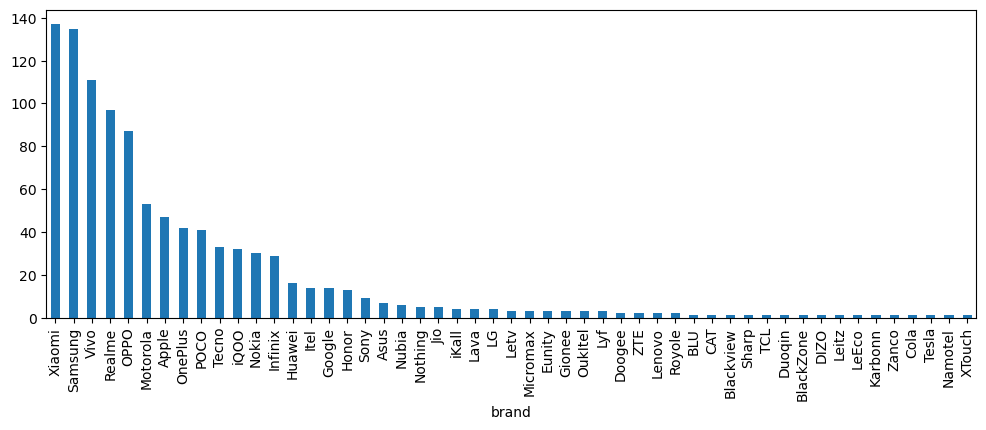

In [50]:
plt.figure(figsize=(12,4))
print([(df['brand'].value_counts().values[i],df['brand'].value_counts().index[i]) for i in range(14)])
df['brand'].value_counts().plot(kind='bar')
plt.show()

#### Price and Brand --

In [11]:
# vertu is clearly a outlier
df.drop([430],axis=0,inplace=True)

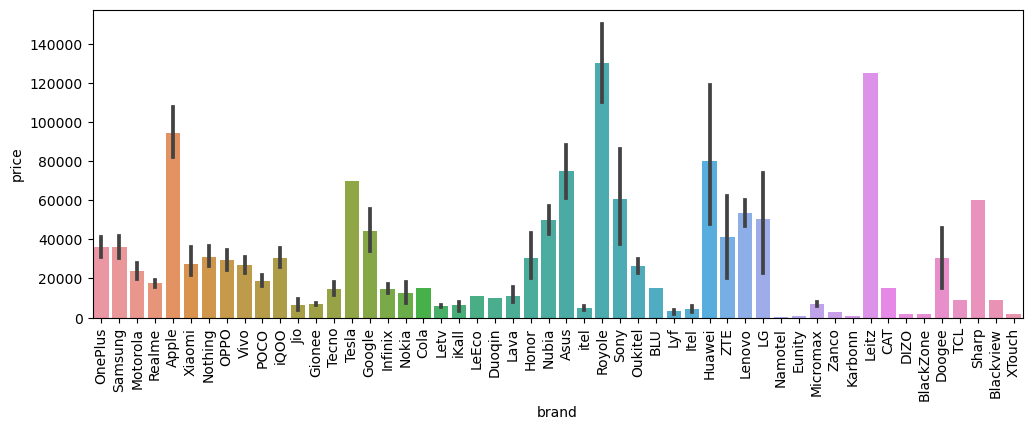

In [12]:
plt.figure(figsize=(12,4))
sns.barplot(x=df['brand'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

### 2. Processor :

[(416, 'Snapdragon'), (202, 'Helio'), (175, 'Dimensity'), (50, 'Exynos'), (45, 'Bionic'), (35, 'Unisoc'), (24, 'Tiger'), (9, 'Google'), (7, 'Kirin'), (1, 'Fusion')]


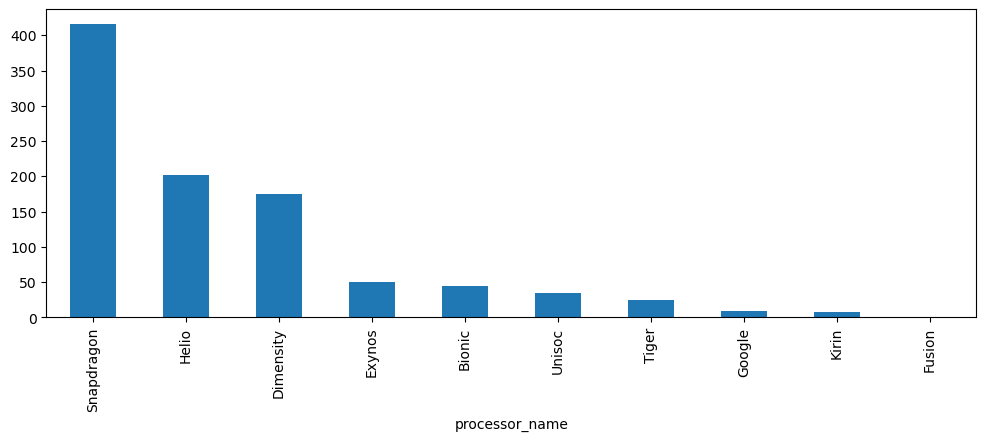

In [15]:
# processor name
plt.figure(figsize=(12,4))
print([(df['processor_name'].value_counts().values[i],df['processor_name'].value_counts().index[i]) for i in range(10)])
df['processor_name'].value_counts().plot(kind='bar')
plt.show()

In [45]:
# brands whose 'processor_name' is missing
df[df['processor_name'].isnull()==True]['brand'].value_counts()

brand
Samsung      15
Nokia        12
Itel          6
iKall         4
Eunity        3
Jio           2
Tesla         1
Tecno         1
Huawei        1
BlackZone     1
LG            1
Motorola      1
Karbonn       1
Apple         1
Zanco         1
Namotel       1
XTouch        1
Name: count, dtype: int64

In [46]:
# groupby 'brand' and 'processor_name'
print(df.groupby(by=['brand','processor_name'],as_index=False).size().values)

[['Apple' 'Bionic' 45]
 ['Apple' 'Fusion' 1]
 ['Asus' 'Dimensity' 2]
 ['Asus' 'Snapdragon' 5]
 ['BLU' 'Dimensity' 1]
 ['Blackview' 'Helio' 1]
 ['CAT' 'Snapdragon' 1]
 ['Cola' 'Helio' 1]
 ['DIZO' 'Unisoc' 1]
 ['Doogee' 'Dimensity' 1]
 ['Doogee' 'Helio' 1]
 ['Duoqin' 'Helio' 1]
 ['Gionee' 'Helio' 1]
 ['Gionee' 'Tiger' 2]
 ['Google' 'Google' 9]
 ['Google' 'Snapdragon' 5]
 ['Honor' 'Dimensity' 1]
 ['Honor' 'Helio' 2]
 ['Honor' 'Snapdragon' 10]
 ['Huawei' 'Kirin' 7]
 ['Huawei' 'Snapdragon' 8]
 ['Infinix' 'Dimensity' 6]
 ['Infinix' 'Helio' 20]
 ['Infinix' 'Tiger' 3]
 ['Itel' 'Unisoc' 8]
 ['Jio' 'Snapdragon' 3]
 ['LG' 'Snapdragon' 3]
 ['Lava' 'Dimensity' 2]
 ['Lava' 'Helio' 2]
 ['LeEco' 'Tiger' 1]
 ['Leitz' 'Snapdragon' 1]
 ['Lenovo' 'Snapdragon' 2]
 ['Letv' 'Tiger' 2]
 ['Letv' 'Unisoc' 1]
 ['Lyf' 'Snapdragon' 3]
 ['Micromax' 'Tiger' 1]
 ['Micromax' 'Unisoc' 2]
 ['Motorola' 'Dimensity' 2]
 ['Motorola' 'Helio' 11]
 ['Motorola' 'Snapdragon' 37]
 ['Motorola' 'Tiger' 2]
 ['Nokia' 'Snapdragon' 10]